## sentiment analysis model
This code builds and trains a sentiment analysis model using:

1.Embedding Layer: Converts word indices to dense vectors.

2.Stacked LSTM Layers: Captures sequential patterns in the text.

3.Dense Output Layer: Predicts sentiment (positive/negative).

4.Callbacks: Improve training efficiency and prevent overfitting.

In [ ]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# Measure the execution time of the cell
%%time
#load dataset with a vocab size
vocab_size = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

CPU times: total: 2.73 s
Wall time: 2.74 s


In [10]:
# pad sequences to
max_len = 150
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)

X_train shape is  (25000, 150)
X_test shape is  (25000, 150)


In [11]:
X_train[:1]

array([[  12,   16,   43,  530,   38,   76,   15,   13, 1247,    4,   22,
          17,  515,   17,   12,   16,  626,   18,    2,    5,   62,  386,
          12,    8,  316,    8,  106,    5,    4,    2,    2,   16,  480,
          66,    2,   33,    4,  130,   12,   16,   38,  619,    5,   25,
         124,   51,   36,  135,   48,   25, 1415,   33,    6,   22,   12,
         215,   28,   77,   52,    5,   14,  407,   16,   82,    2,    8,
           4,  107,  117,    2,   15,  256,    4,    2,    7,    2,    5,
         723,   36,   71,   43,  530,  476,   26,  400,  317,   46,    7,
           4,    2, 1029,   13,  104,   88,    4,  381,   15,  297,   98,
          32,    2,   56,   26,  141,    6,  194,    2,   18,    4,  226,
          22,   21,  134,  476,   26,  480,    5,  144,   30,    2,   18,
          51,   36,   28,  224,   92,   25,  104,    4,  226,   65,   16,
          38, 1334,   88,   12,   16,  283,    5,   16,    2,  113,  103,
          32,   15,   16,    2,   19, 

In [12]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))

# Sttacked LSTM layers
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50)) # last LSTM layer without return-seq

model.add(Dense(units=1, activation='sigmoid'))

c:\Users\TUF GAMING\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


In [ ]:
# Definre callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

epochs = 100
batch_size = 64

In [ ]:
%%time
# The model trains and stores the training history in history
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test[:100], y_test[:100]),
                    callbacks=[early_stopping,reduce_lr]

)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 115ms/step - accuracy: 0.6300 - loss: 0.6192 - val_accuracy: 0.7800 - val_loss: 0.4958 - learning_rate: 0.0010
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.7438 - loss: 0.5271 - val_accuracy: 0.8500 - val_loss: 0.3463 - learning_rate: 0.0010
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.7353 - loss: 0.5263 - val_accuracy: 0.8000 - val_loss: 0.4492 - learning_rate: 0.0010
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.8142 - loss: 0.4294 - val_accuracy: 0.8300 - val_loss: 0.3102 - learning_rate: 0.0010
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.8551 - loss: 0.3619 - val_accuracy: 0.8900 - val_loss: 0.2642 - learning_rate: 0.0010
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.8800 - loss: 0.3008 - val_accuracy: 0.8500 - val_loss: 0.2846 - learning_rate: 0.0010
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accura

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8587 - loss: 0.3210
Test loss: 0.3217
Test Accuracy: 0.8600


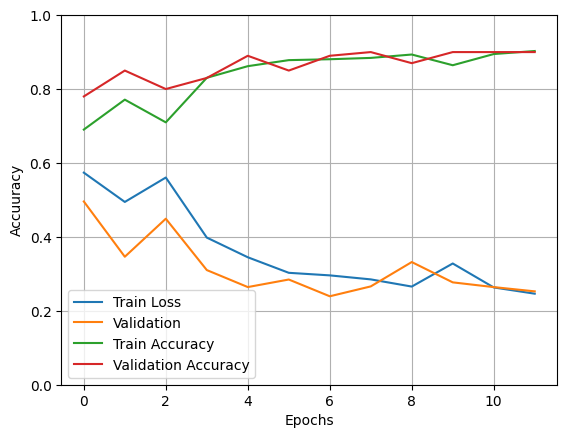

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuuracy')
plt.ylim([0,1])
plt.legend()
plt.grid()